## Exploratory Analysis of Stack Overflow Survey 

Database can be useful to predict salaries, check top skills for different roles & define specific knowledge requirements for job postings

## Steps to follow:

- Basic Information and Descriptive Statistics
- Correlation Analysis
- Visualizations

## Things to consider: 

Check for imbalances in the dataset.

In [4]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
df = pd.read_csv("survey_results_public.csv")
pd.set_option('display.max_columns', None)

print(df.columns.to_list())

['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline', 'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType', 'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country', 'Currency', 'CompTotal', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith', 'PlatformWantToWorkWith', 'WebframeHaveWorkedWith', 'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use', 'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith', 'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith', 'AISearchWantToWorkWith', 'AIDevHaveWorkedWith', 'AIDevWantToWorkWith', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFr

## Basic Information and Descriptive Statistics

In [14]:
df.describe()

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
count,89184.000000,4.822500e+04,43579.000000,4.801900e+04
mean,44592.500000,1.036807e+42,11.405126,1.031101e+05
std,25745.347541,2.276847e+44,9.051989,6.814188e+05
min,1.000000,0.000000e+00,0.000000,1.000000e+00
25%,22296.750000,6.300000e+04,5.000000,4.390700e+04
50%,44592.500000,1.150000e+05,9.000000,7.496300e+04
75%,66888.250000,2.300000e+05,16.000000,1.216410e+05
max,89184.000000,5.000000e+46,50.000000,7.435143e+07


In [6]:
#Numerical columns
num = df.select_dtypes(exclude='O')
num.head(5)

,ResponseId,CompTotal,WorkExp,ConvertedCompYearly
0,1,NaN,NaN,NaN
1,2,285000.0,10.0,285000.0
2,3,250000.0,23.0,250000.0
3,4,156000.0,7.0,156000.0
4,5,1320000.0,6.0,23456.0


In [7]:
#categorical columns
cat = df.select_dtypes(include='O')
cat.head(5)

,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase
0,I agree,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,Other,18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,Investigate,Start a free trial;Ask developers I know/work ...,United States of America,USD\tUnited States dollar,HTML/CSS;JavaScript;Python,Bash/Shell (all shells);C#;Dart;Elixir;GDScrip...,Supabase,Firebase Realtime Database;Supabase,Amazon Web Services (AWS);Netlify;Vercel,Fly.io;Netlify;Render,Next.js;React;Remix;Vue.js,Deno;Elm;Nuxt.js;React;Svelte;Vue.js,Electron;React Native;Tauri,Capacitor;Electron;Tauri;Uno Platform;Xamarin,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Godot;npm;pnpm;Unity 3D;Unreal Engine;Vite;Web...,Vim;Visual Studio Code,Vim;Visual Studio Code,iOS;iPadOS;MacOS;Windows;Windows Subsystem for...,MacOS;Windows;Windows Subsystem for Linux (WSL),Asana;Basecamp;GitHub Discussions;Jira;Linear;...,GitHub Discussions;Linear;Notion;Trello,Cisco Webex Teams;Discord;Google Chat;Google M...,Discord;Signal;Slack;Zoom,ChatGPT,ChatGPT;Neeva AI,GitHub Copilot,GitHub Copilot,Stack Overflow;Stack Exchange,Daily or almost daily,Yes,A few times per month or weekly,"Yes, definitely","I don't think it's super necessary, but I thin...",Yes,Indifferent,Other (please explain),Somewhat distrust,Learning about a codebase;Writing code;Debuggi...,Writing code;Committing and reviewing code,NaN,NaN,NaN,NaN,NaN,NaN,Yes,People manager,Strongly agree,Agree,Strongly agree,Agree,Agree,Agree,Agree,Strongly agree,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy
2,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,NaN,27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,Given a list,Start a free trial;Ask dev

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89184 entries, 0 to 89183
Data columns (total 84 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ResponseId                           89184 non-null  int64  
 1   Q120                                 89184 non-null  object 
 2   MainBranch                           89184 non-null  object 
 3   Age                                  89184 non-null  object 
 4   Employment                           87898 non-null  object 
 5   RemoteWork                           73810 non-null  object 
 6   CodingActivities                     73764 non-null  object 
 7   EdLevel                              87973 non-null  object 
 8   LearnCode                            87663 non-null  object 
 9   LearnCodeOnline                      70084 non-null  object 
 10  LearnCodeCoursesCert                 37076 non-null  object 
 11  YearsCode                   

In [15]:
df.isnull().sum()

ResponseId 0
Q120 0
MainBranch 0
Age 0
Employment 1286
 ... 
ProfessionalTech 47401
Industry 52410
SurveyLength 2699
SurveyEase 2630
ConvertedCompYearly 41165
Length: 84, dtype: int64

In [ ]:
#To elimate all those rows with null values above
#df_cleaned = df.dropna()

In [12]:
columns = list(df.columns)

In [13]:
df.duplicated().sum()

1203

In [14]:


df[df.duplicated()]

,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,LearnCodeCoursesCert,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,TechList,BuyNewTool,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,PlatformHaveWorkedWith,PlatformWantToWorkWith,WebframeHaveWorkedWith,WebframeWantToWorkWith,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,AISearchHaveWorkedWith,AISearchWantToWorkWith,AIDevHaveWorkedWith,AIDevWantToWorkWith,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOComm,SOAI,AISelect,AISent,AIAcc,AIBen,AIToolInterested in Using,AIToolCurrently Using,AIToolNot interested in Using,AINextVery different,AINextNeither different nor similar,AINextSomewhat similar,AINextVery similar,AINextSomewhat different,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
ResponseId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
305,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
734,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
876,None of these,45-54 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
915,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
994,None of these,18-24 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88821,None of these,35-44 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88829,None of these,25-34 years old,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
print(df.shape)
print(df.apply(lambda col: col.unique())) 

table = pd.DataFrame({
    'Unique':df.nunique(),
    'Null':df.isna().sum(),
    'NullPercent':df.isna().sum() / len(df),
    'Type':df.dtypes.values
})
display(table)

(87981, 82)
MainBranch             [None of these, I am a developer by profession...
Age                    [18-24 years old, 25-34 years old, 45-54 years...
Employment             [nan, Employed, full-time, Employed, full-time...
RemoteWork             [nan, Remote, Hybrid (some remote, some in-per...
CodingActivities       [nan, Hobby;Contribute to open-source projects...
                                             ...                        
ProfessionalTech       [nan, DevOps function;Microservices;Automated ...
Industry               [nan, Information Services, IT, Software Devel...
SurveyLength           [nan, Appropriate in length, Too long, Too short]
SurveyEase             [nan, Easy, Neither easy nor difficult, Diffic...
ConvertedCompYearly    [nan, 285000.0, 250000.0, 156000.0, 23456.0, 9...
Length: 82, dtype: object


,Unique,Null,NullPercent,Type
MainBranch,6,0,0.000000,object
Age,8,0,0.000000,object
Employment,106,83,0.000943,object
RemoteWork,3,14171,0.161069,object
CodingActivities,116,14217,0.161592,object
...,...,...,...,...
ProfessionalTech,284,46198,0.525091,object
Industry,12,51207,0.582023,object
SurveyLength,3,1496,0.017004,object
SurveyEase,3,1427,0.016219,object


## Visualization and correlation analysis 

In [17]:
# Setting Seaborn theme for visualizations
sns.set_theme()
sns.set(rc={'figure.figsize':(6,6)})
sns.set_context("paper")

<ipython-input-14-957c0545639c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, fmt='.1f')


<Axes: >

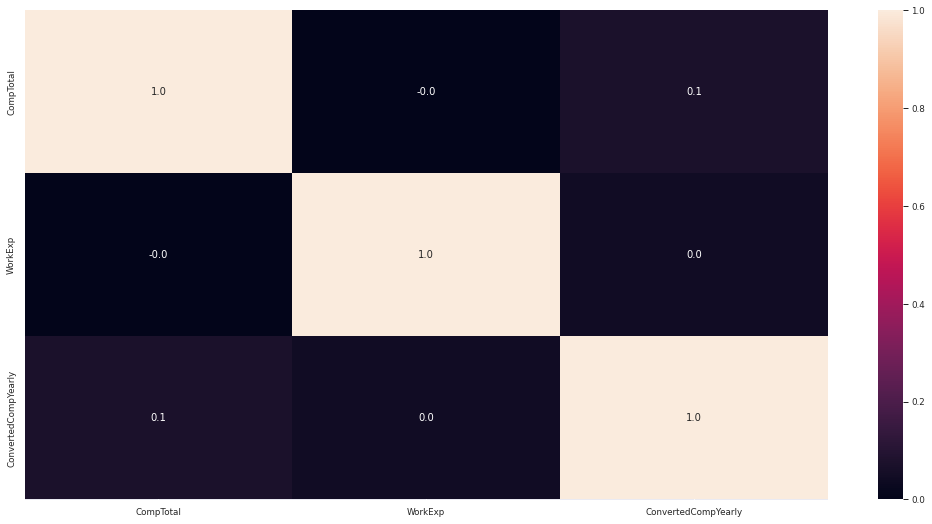

In [14]:
plt.figure(figsize=(18,9))
sns.heatmap(df.corr(), annot=True, fmt='.1f')

It is very dificuilt to do correlation analysis because most of the data is categorical 

[Text(0.5, 0, 'Number of responses'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Responses by job role')]

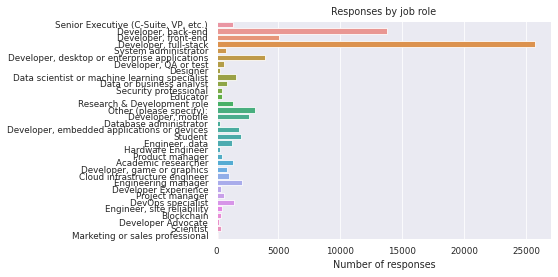

In [18]:
# Responses split by job roles
sns.countplot(df, y='DevType').set(xlabel='Number of responses', ylabel='', title='Responses by job role') #stat='percent'

<Axes: title={'center': 'Countries with >1000 responses'}, xlabel='Number of responses'>

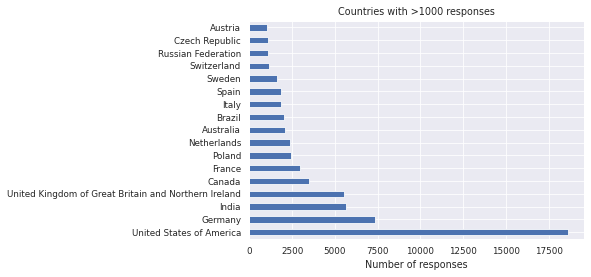

In [19]:
# Countries with >1000 responses
countries = df.Country.value_counts()
countries_top = countries[countries>1000]
countries_top.plot(kind="barh", ylabel='', xlabel='Number of responses', title='Countries with >1000 responses')

<Axes: title={'center': 'Country of respondents'}, xlabel='Number of responses'>

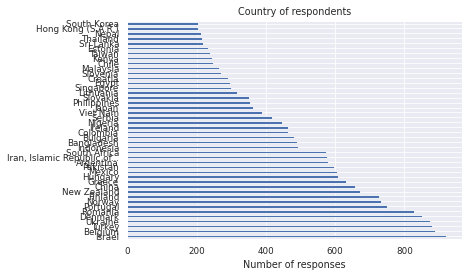

In [20]:
# Countries with between 200 and 1000 responses
countries[((countries>200) & (countries<1000))].plot(kind="barh", ylabel='', xlabel='Number of responses', title='Country of respondents')

<Axes: title={'center': 'Age of respondents'}>

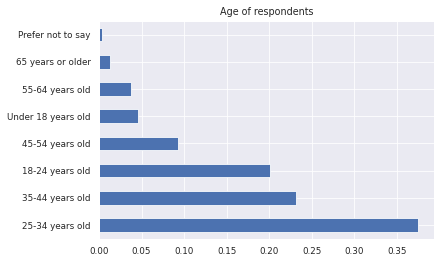

In [21]:

# Percentage of responses by age categories
df['Age'].value_counts(normalize=True).plot(kind="barh", ylabel='', title='Age of respondents')

In [22]:
# Simplifying Secondary school response
df['EdLevel'].replace(to_replace='Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',value='Secondary school', inplace=True)

<Axes: title={'center': 'Highest level of education completed'}>

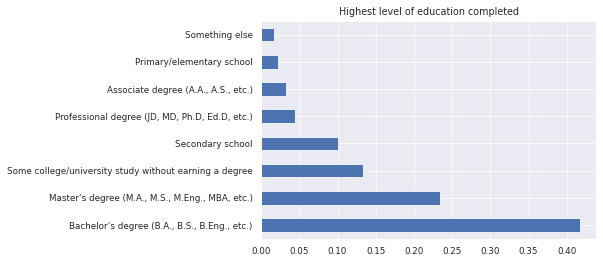

In [23]:
df['EdLevel'].value_counts(normalize=True).plot(kind="barh", ylabel='', title='Highest level of education completed')

<Axes: title={'center': 'Highest level of education completed for data scientist or machine learning specialist'}>

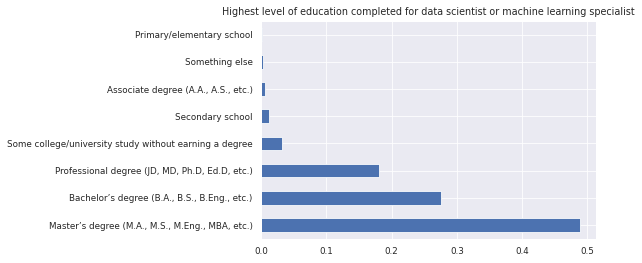

In [24]:

df.loc[df['DevType']=='Data scientist or machine learning specialist','EdLevel'].value_counts(normalize=True).plot(kind="barh", title="Highest level of education completed for data scientist or machine learning specialist", ylabel='')

<Axes: title={'center': 'Highest level of education completed for data or business analyst'}>

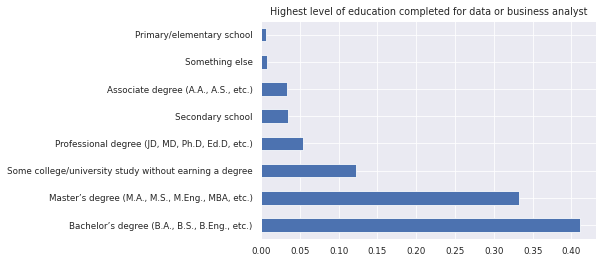

In [25]:
df.loc[df['DevType']=='Data or business analyst','EdLevel'].value_counts(normalize=True).plot(kind="barh", title="Highest level of education completed for data or business analyst", ylabel='')


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Median annual compensation for remote/in-person work')]

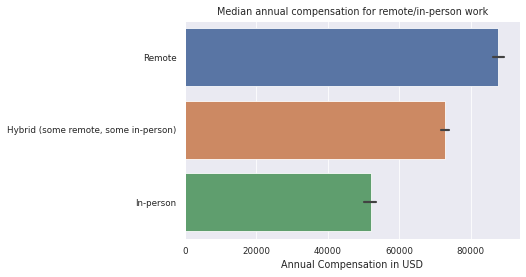

In [26]:
sns.barplot(df, y='RemoteWork', 
            x='ConvertedCompYearly',
            estimator = 'median').set(ylabel = '', 
                                         xlabel = 'Annual Compensation in USD', 
                                         title = 'Median annual compensation for remote/in-person work')


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Median annual compensation by job role')]

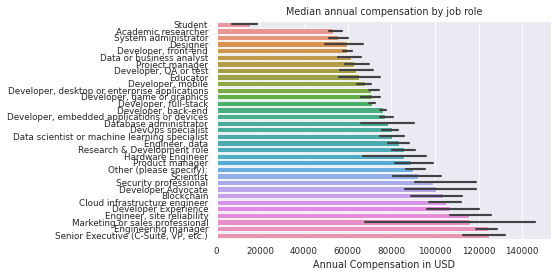

In [27]:

result = df.groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df, y='DevType', x='ConvertedCompYearly', estimator='median', 
            order=result['DevType']).set(ylabel = '', 
                                         xlabel = 'Annual Compensation in USD', 
                                         title = 'Median annual compensation by job role')


[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Median annual compensation for job role in USA')]

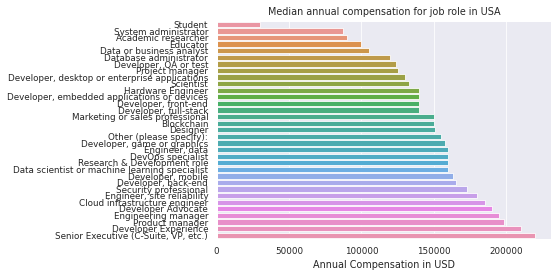

In [28]:
result = df[df.Country == "United States of America"].groupby(["DevType"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df[df.Country == "United States of America"], 
            y='DevType', 
            x='ConvertedCompYearly', 
            estimator='median', 
            order=result['DevType'],
            errorbar=None).set(ylabel = '', xlabel = 'Annual Compensation in USD', title = 'Median annual compensation for job role in USA')

[Text(0, 0.5, ''),
 Text(0.5, 0, 'Annual Compensation in USD'),
 Text(0.5, 1.0, 'Median annual compensation by industry')]

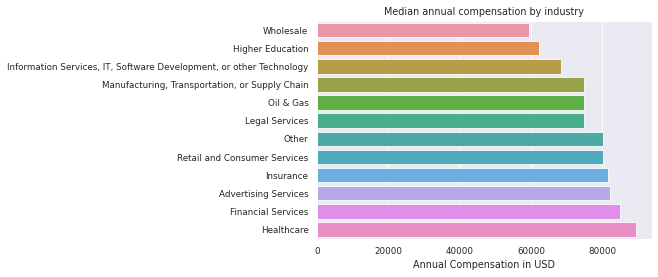

In [29]:
result = df[df.Industry.notnull()].groupby(["Industry"])['ConvertedCompYearly'].aggregate(np.median).reset_index().sort_values('ConvertedCompYearly')
sns.barplot(df[df.Industry.notnull()], 
            y='Industry', 
            x='ConvertedCompYearly', 
            estimator='median', 
            order=result['Industry'],
            errorbar=None).set(ylabel = '', xlabel = 'Annual Compensation in USD', title = 'Median annual compensation by industry')


In [30]:
languages_df = df[['DevType', 'LanguageHaveWorkedWith']].copy()
languages_df

,DevType,LanguageHaveWorkedWith
ResponseId,,
1,NaN,NaN
2,"Senior Executive (C-Suite, VP, etc.)",HTML/CSS;JavaScript;Python
3,"Developer, back-end",Bash/Shell (all shells);Go
4,"Developer, front-end",Bash/Shell (all shells);HTML/CSS;JavaScript;PH...
5,"Developer, full-stack",HTML/CSS;JavaScript;TypeScript
...,...,...
89180,"Developer, front-end",HTML/CSS;Java;JavaScript;SQL;TypeScript
89181,"Developer, back-end",Dart;Java;Python;SQL
89182,NaN,Assembly;Bash/Shell (all shells);C;C#;Python;R...


In [31]:
languages = [
'Assembly',
'Bash/Shell (all shells)',
'C',
'C#',
'C++',
'Dart',
'Delphi',
'Fortran',
'GDScript',
'Go',
'Groovy',
'Haskell',
'HTML/CSS',
'Java',
'JavaScript',
'Julia',
'Kotlin',
'Lisp',
'Lua',
'MATLAB',
'Objective-C',
'Perl',
'PHP',
'PowerShell',
'Python',
'R',
'Ruby',
'Rust',
'Scala',
'SQL',
'Swift',
'TypeScript',
'VBA',
'Visual Basic (.Net)'         
]

languages_df = languages_df.join(
    languages_df['LanguageHaveWorkedWith'].str.get_dummies(sep=';')
    .reindex(languages, axis=1, fill_value=0).astype(bool)
)

In [32]:
languages_counts = dict.fromkeys(languages)

In [33]:
for language in languages:
    languages_counts[language] = languages_df[language].sum()/len(languages_df)

In [34]:
languages_counts.keys()

dict_keys(['Assembly', 'Bash/Shell (all shells)', 'C', 'C#', 'C++', 'Dart', 'Delphi', 'Fortran', 'GDScript', 'Go', 'Groovy', 'Haskell', 'HTML/CSS', 'Java', 'JavaScript', 'Julia', 'Kotlin', 'Lisp', 'Lua', 'MATLAB', 'Objective-C', 'Perl', 'PHP', 'PowerShell', 'Python', 'R', 'Ruby', 'Rust', 'Scala', 'SQL', 'Swift', 'TypeScript', 'VBA', 'Visual Basic (.Net)'])

[Text(0.5, 1.0, 'Most popular programming languages for all respondents')]

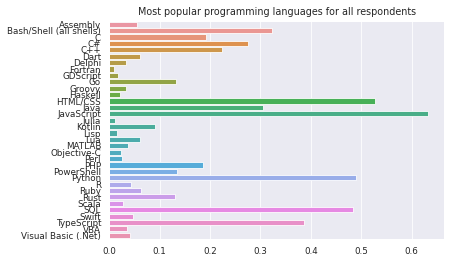

In [35]:

sns.barplot(y=list(languages_counts.keys()), x=list(languages_counts.values())).set(title="Most popular programming languages for all respondents")

In [36]:
data_counts = dict.fromkeys(languages)
ml_counts = dict.fromkeys(languages)
fulldev_counts = dict.fromkeys(languages)

In [37]:
#Change DevType to check relevant tools for each role
for language in languages:
    data_counts[language] = languages_df[languages_df['DevType']=='Data or business analyst'][language].sum()/len(languages_df[languages_df['DevType']=='Data or business analyst'])
    ml_counts[language] = languages_df[languages_df['DevType']=='Data scientist or machine learning specialist'][language].sum()/len(languages_df[languages_df['DevType']=='Data scientist or machine learning specialist'])
    fulldev_counts[language] = languages_df[languages_df['DevType']=='Developer, full-stack'][language].sum()/len(languages_df[languages_df['DevType']=='Developer, full-stack'])

[Text(0.5, 1.0, 'Most popular programming languages for data or business analyst')]

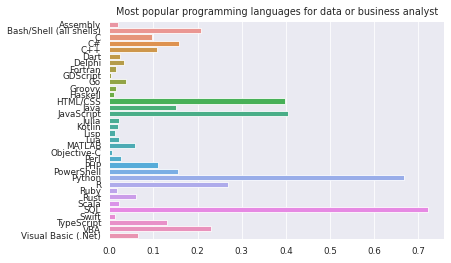

In [38]:
sns.barplot(y=list(data_counts.keys()), x=list(data_counts.values())).set(title="Most popular programming languages for data or business analyst")

[Text(0.5, 1.0, 'Most popular programming languages for data scientists or machine learning specialists')]

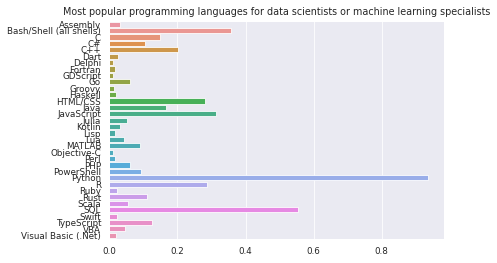

In [36]:
sns.barplot(y=list(ml_counts.keys()), x=list(ml_counts.values())).set(title="Most popular programming languages for data scientists or machine learning specialists")

[Text(0.5, 1.0, 'Most popular programming languages for full stack devs')]

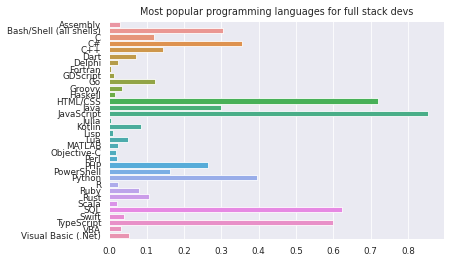

In [37]:
sns.barplot(y=list(fulldev_counts.keys()), x=list(fulldev_counts.values())).set(title="Most popular programming languages for full stack devs")

In [39]:
def split_multicolumn(col_series):
    result_df = pd.get_dummies(col_series.str.split(';', expand=True).stack(), prefix='', prefix_sep='').groupby(level=0).max()
    return result_df.astype(bool)

languages_worked_df = split_multicolumn(df['LanguageHaveWorkedWith'])
languages_interested_df = split_multicolumn(df['LanguageWantToWorkWith'])

In [40]:
languages_loved_df = languages_worked_df & languages_interested_df
languages_loved_percentages = (languages_loved_df.sum() * 100/ languages_worked_df.sum()).sort_values(ascending=False)

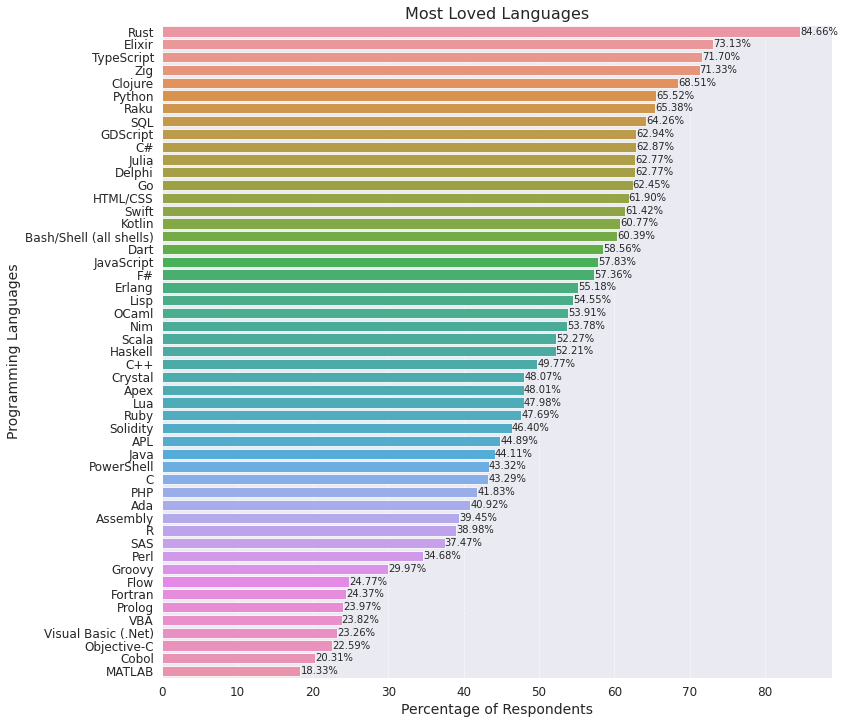

In [41]:
plt.figure(figsize=(12, 12))

# Choose a color palette (e.g., "muted")
sns.set_palette("muted")

# Use seaborn's barplot with hue
ax = sns.barplot(x=languages_loved_percentages, y=languages_loved_percentages.index, dodge=False)

# Set plot title and labels
plt.title("Most Loved Languages", fontsize=16)
plt.xlabel('Percentage of Respondents', fontsize=14)
plt.ylabel('Programming Languages', fontsize=14)

# Customize ticks and grid
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust legend placement
# plt.legend(title='Languages', title_fontsize='14', bbox_to_anchor=(1, 1), loc='upper left', fontsize='12')
for p in ax.patches:
    percentage = f"{p.get_width():.2f}%"
    x = p.get_x() + p.get_width() + 0.01
    y = p.get_y() + p.get_height() / 2
    ax.annotate(percentage, (x, y), fontsize=10, va='center')

# Show the plot
plt.show()
# Show the plot
plt.show()

## Conclusion:

This dataset offers great potential to define characteristics (especially hard skills) for different job roles, compare salaries between countries and examine how development experience affects various other factors. 

## Main problem

Most of the data is categorical and because of computational power limitations to process the data, we need to find a workaround on how to process it for further analysis. 